# [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion) Research
Reference [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

## Flip coin model - One random variable, binary states
Let's start with the simplest game: flipping a coin with 70%/30% chance win or lose, which give you two different rate of return: 100% and -100% (If you win, you double your investment, if you lose, you lose all). Then what percentage of your money should you use to play the game?

Notations:
- $ p_{win} $: The probability of winning.
- $ p_{lose} = 1 - p_{win} $: The probability of losing.
- $ r_{win} \in (0, +\infty) $: Payout / rate of return when winning.
- $ r_{lose} \in [-1,0) $: Payout / rate of return when losing.
- $ m_n $: Total asset / money after $ n^{th} $ game.
- $ x \in [0, 1] $: Our target investment fraction, which is also the solution of the puzzle.

Let's write the recursive formula of you money before and after $ n^{th} $ game assume we only put $ x $ portion of our money.
- **Win:** $ m_{n+1} = m_n + x m_n r_{win} = m_n (1 + r_{win} x) $
- **Lose:** $ m_{n+1} = m_n + x m_n r_{lose} = m_n (1 + r_{lose} x) $

After $ n $ games, we will win $ np_{win} $ times and lose $ np_{lose} $ times. The final result will be:

$ m_n = m_{0} (1 + r_{win} x)^{np_{win}} (1 + r_{lose} x)^{np_{lose}} $

When playing $ \infty $ games, the average return will be:

$ \lim\limits_{n \to \infty} \sqrt[n]{ \frac{m_n}{m_0} } = (1 + r_{win} x)^{p_{win}} (1 + r_{lose} x)^{p_{lose}} $

[autoreload of newtons_method failed: Traceback (most recent call last):
  File "C:\Users\Mu Niu\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Mu Niu\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Python312\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 994, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "c:\Users\Mu Niu\OneDrive\Documents\GitHub\InvestmentManagement\kelly_criterion_solver_py\newtons_method.py", line 3, in <module>
    from kelly_criterion_solver_py.multivariate_kelly import kellyCalculation
ModuleNotFoundError: No module named 'k

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Expectation is: 0.400
Iteration 0: Investment fraction is: 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 40.00%, Log Return is: 0.082
Converged in 1 iterations.


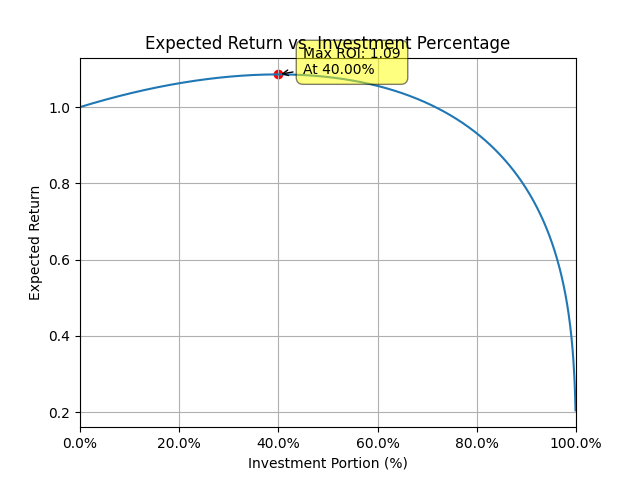

In [79]:
%load_ext autoreload
%autoreload 2

import numpy as np
from plot import *
from newtons_method import newtonsMethod

R_WIN = 1.00   # Double the investment.
R_LOSE = -1.00 # Lose all.
R = np.array([R_WIN, R_LOSE])

P_WIN = 0.7
P_LOSE = 1 - P_WIN
P = np.array([P_WIN, P_LOSE])

X_range = np.arange(0, 1, 0.001)
expected_returns = ((1 + R_WIN * X_range) ** P_WIN) * ((1 + R_LOSE * X_range) ** P_LOSE)

print(f'Expectation is: {P_WIN * R_WIN + P_LOSE * R_LOSE:.3f}')
newtonsMethod(R, P, verbose=True)  # Use Newton's method to verify the result

optimal_investment_fraction = - P_WIN / R_LOSE - P_LOSE / R_WIN
draw2dPlot(X_range, expected_returns, optimal_investment_fraction, np.max(expected_returns))

### Take the Logarithm

We want the left-hand side to be maximum to provide us best rate of return per game, which means we need to let the first order derivative of right-hand side equal to 0.

Take a logarithm to both side will make the calculation much easier:

$ G(x) = \lim\limits_{n \to \infty} \frac{1}{n} \ln{\frac{m_n}{m_0}} = p_{win} \ln{(1 + r_{win} x)} + p_{lsoe} \ln{(1 + r_{lose} x)} $

$ G'(x) = \frac{p_{win} r_{win}}{1 + r_{win} x} + \frac{p_{lose} r_{lose}}{1 + r_{lose} x} = 0 $

$ G''(x) = -\frac{p_{win}r^2_{win}}{(1+r_{win}x)^2} - \frac{p_{lose}r^2_{lose}}{(1+r_{lose}x)^2} \le 0 $

The second derivative is always smaller than zero which shows $ G(x) $ is **concave** hence will have maximum point.

$ G'(0) = p_{win} r_{win} + p_{lose} r_{lose} = E(r) $

$ x = \frac{p_{win} r_{win} + p_{lose} r_{lose}}{- r_{win} r_{lose}} = -\frac{p_{win}}{r_{lose}} - \frac{p_{lose}}{r_{win}} $

Above is the stardard Kelly Criterion.

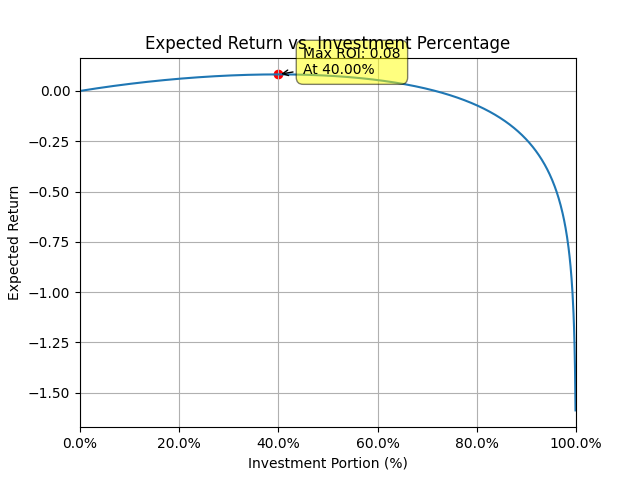

In [80]:
# Draw the same plot in log:
expected_returns = P_WIN * np.log(1 + R_WIN * X_range) + P_LOSE * np.log(1 + R_LOSE * X_range)  # Average log return per game

max_expected_return = np.max(expected_returns)
max_index = np.argmax(expected_returns)
optimal_investment_fraction = X_range[max_index]

draw2dPlot(X_range, expected_returns, optimal_investment_fraction, max_expected_return)

## One random variable, multi-states

Instead of two-state, the discrete probability function can be furthermore represented as the following where there are $ s $ states:

$ \sum^{s}_{i=1} p_i = 1 $

$ G(x) = \sum^{s}_{i=1} p_i \ln{(1 + r_i x)} $

$ G'(x) = \sum^{s}_{i=1} \frac{p_i r_i}{1 + r_i x} $

$ G''(x) = -\sum^{s}_{i=1} \frac{p_i r_i^2}{(1+r_i x)^2} \le 0 $

Everything holds the same with binary states.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Expectation is 0.0099
Iteration 0: Investment fraction is: 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 23.82%, Log Return is: 0.001
Iteration 2: Investment fraction is: 24.51%, Log Return is: 0.001
Iteration 3: Investment fraction is: 24.51%, Log Return is: 0.001
Converged in 3 iterations.


c:\Users\Mu Niu\OneDrive\Documents\GitHub\InvestmentManagement\kelly_criterion_solver_py\probability_generator.py:19: RuntimeWarning: divide by zero encountered in log
  log_returns = np.log(1 + R)


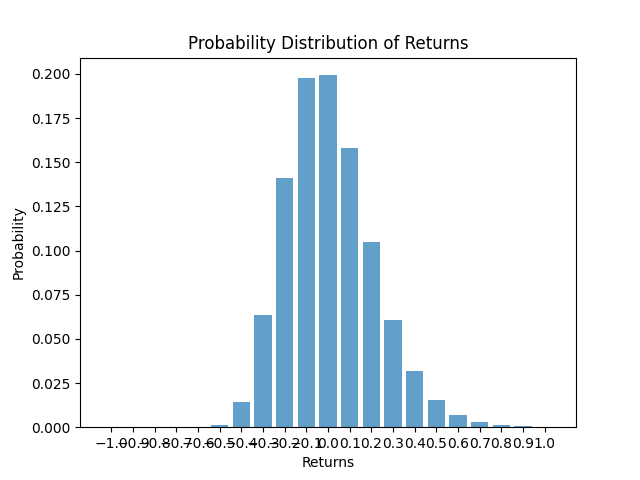

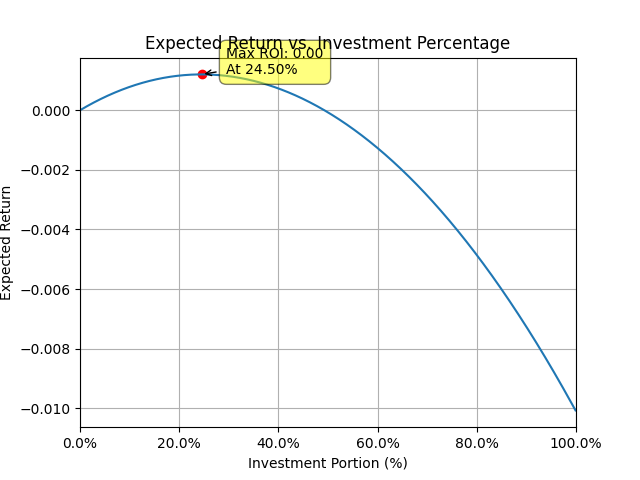

In [81]:
%load_ext autoreload
%autoreload 2

import numpy as np
from plot import *
from probability_generator import generate1dGaussian
from newtons_method import newtonsMethod


STATE_SIZE = 21
R = np.linspace(-1, 1, STATE_SIZE)
P = generate1dGaussian(R, -0.05, 0.2)
X_range = np.arange(0, 1, 0.001)

def RateOfReturn(probabilities, returns, fractions):
    assert np.isclose(probabilities.sum(), 1), "Probabilities must sum up to 1"
    assert probabilities.size == returns.size, "The size of probabilities and returns arrays must be the same"
    return np.sum(probabilities * np.log(1 + returns * fractions[:, np.newaxis]), axis=1)


expected_returns = RateOfReturn(P, R, X_range)
max_expected_return = np.max(expected_returns)
max_index = np.argmax(expected_returns)
optimal_investment_fraction = X_range[max_index]  # Keep as decimal

print(f'Expectation is {P.dot(R):.4f}')
newtonsMethod(R, P, verbose=True)  # Use Newton's method to verify the result

# Drawings
drawProbability1D(R, P)
draw2dPlot(X_range, expected_returns, optimal_investment_fraction, max_expected_return)

## Two Random Variables

To expand from one random variable (one investment world) to two random variables (two investments in the world), we would change the discrete probability function from $ p(r) $ to $ p(r_1, r_2) $, then meaning behind the notation is there is a probability for each return from investment 1 ($ r_1 $) and return for investment 2 ($ r_2 $).

The reason to not use $ p_1(r_1) * p_2(r_2) $ is because we also want to consider correlation between the two random variables.

The extended formula is also similar to the one random variable:

$ G(x, y) = \sum_{j=1}^{s_2} \sum_{i=1}^{s_1} p(r_i, r_j) \ln{(1 + r_i x + r_j y)} $

$ \frac{dG}{dx} = \sum_{j=1}^{s_2} \sum_{i=1}^{s_1} \frac{p(r_i, r_j)r_i}{1 + r_i x + r_j y} $

$ \frac{dG}{dy} = \sum_{j=1}^{s_2} \sum_{i=1}^{s_1} \frac{p(r_i, r_j)r_j}{1 + r_i x + r_j y} $

The $ G(x, y) $ is still concave because $ \ln(x) $ is concave and a positive weighted combination of that is also concave.

## Mathmatical Computation

**Newton's Method** is used to solve the $ X $ with fast convergence.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Expected return for investment 1: 0.0510
Expected return for investment 2: 0.0099


C:\Users\Mu Niu\AppData\Local\Temp\ipykernel_416\825206653.py:26: RuntimeWarning: divide by zero encountered in log
  values[i, j] = np.sum(P * np.log(1 + R[:, np.newaxis] * x + R * y))
C:\Users\Mu Niu\AppData\Local\Temp\ipykernel_416\825206653.py:26: RuntimeWarning: invalid value encountered in multiply
  values[i, j] = np.sum(P * np.log(1 + R[:, np.newaxis] * x + R * y))
C:\Users\Mu Niu\AppData\Local\Temp\ipykernel_416\825206653.py:26: RuntimeWarning: invalid value encountered in log
  values[i, j] = np.sum(P * np.log(1 + R[:, np.newaxis] * x + R * y))


Optimal fraction for investment 1: 99.80%
Optimal fraction for investment 2: 0.20%
Optimal log return is: 0.02979029592231061
Iteration 0: Investment fraction is: 0.00%, 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 81.62%, 18.38%, Log Return is: 0.028
Iteration 2: Investment fraction is: 80.90%, 19.10%, Log Return is: 0.028
Iteration 3: Investment fraction is: 80.91%, 19.09%, Log Return is: 0.028
Iteration 4: Investment fraction is: 80.91%, 19.09%, Log Return is: 0.028
Converged in 4 iterations.


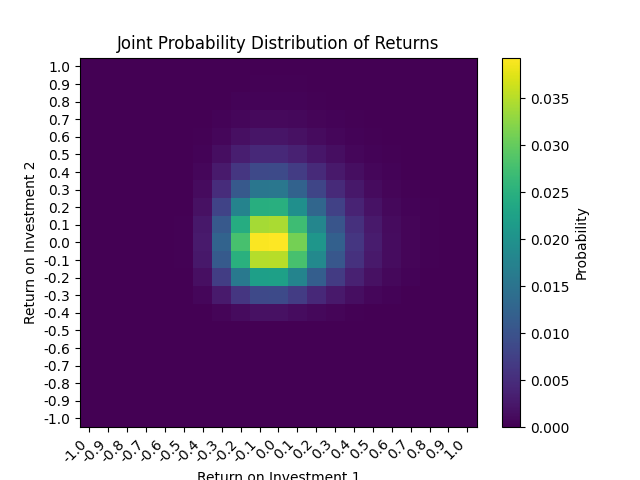

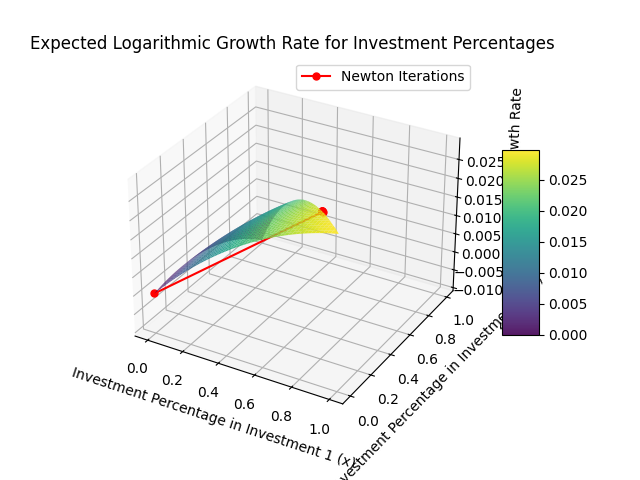

In [82]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
from plot import *
from probability_generator import *
from multivariate_kelly import kellyValue
from newtons_method import newtonsMethod

STATE_SIZE = 21
R = np.linspace(-1, 1, STATE_SIZE)
P = generate2dindependent(generate1dGaussian(R, -0.01, 0.2), generate1dGaussian(R, -0.05, 0.2))

print(f"Expected return for investment 1: {np.sum(P, axis=1).dot(R):.4f}")
print(f"Expected return for investment 2: {np.sum(P, axis=0).dot(R):.4f}")

# Define the grid for investment percentages
X_range = np.arange(0, 1, 0.002)  # Investment percentage for investment 1

values = np.zeros((X_range.size,) * P.ndim)  # Placeholder for the expected logarithmic growth rate

# Calculate the expected logarithmic growth rate for each combination of x and y
for i, x in enumerate(X_range):
    for j, y in enumerate(X_range):
        values[i, j] = np.sum(P * np.log(1 + R[:, np.newaxis] * x + R * y))

# Find the maximum value and index
max_index = np.nanargmax(values)  # This gives us the index in the flattened array
max_indices = np.unravel_index(max_index, values.shape)  # Convert to 2D indices
max_x = X_range[max_indices[0]]
max_y = X_range[max_indices[1]]
max_z = values[max_indices]
print(f'Optimal fraction for investment 1: {max_x * 100:.2f}%')
print(f'Optimal fraction for investment 2: {max_y * 100:.2f}%')
print("Optimal log return is:", max_z)

X_points = newtonsMethod(R, P, verbose=True)
points = np.column_stack((np.array(X_points), np.array([kellyValue(R, P, point) for point in X_points])))

drawProbability2D(R, P)
draw3dPlot(X_range, X_range, values, points)

## Three random variables

This demo will able to show the investment return as color scaled scatter plot and also with Newton's method overlay.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Expected return for investment 1: -0.1917199337200301
Expected return for investment 2: 0.40657954961612447
Expected return for investment 3: -0.09144737415569709
Iteration 0: Investment fraction is: 0.00%, 0.00%, 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 0.00%, 43.50%, 0.00%, Log Return is: 0.085
Iteration 2: Investment fraction is: 0.00%, 54.50%, 0.00%, Log Return is: 0.072
Iteration 3: Investment fraction is: 0.00%, 55.65%, 0.00%, Log Return is: 0.070
Iteration 4: Investment fraction is: 0.00%, 55.85%, 0.08%, Log Return is: 0.070
Iteration 5: Investment fraction is: 0.00%, 55.89%, 0.15%, Log Return is: 0.070
Iteration 6: Investment fraction is: 0.00%, 55.91%, 0.18%, Log Return is: 0.070
Iteration 7: Investment fraction is: 0.00%, 55.92%, 0.20%, Log Return is: 0.070
Iteration 8: Investment fraction is: 0.00%, 55.92%, 0.22%, Log Return is: 0.070
Iteration 9: Investment fracti

c:\Users\Mu Niu\OneDrive\Documents\GitHub\InvestmentManagement\kelly_criterion_solver_py\multivariate_kelly.py:54: RuntimeWarning: divide by zero encountered in log
  denominator += expandDims(R, X.size, i) * x


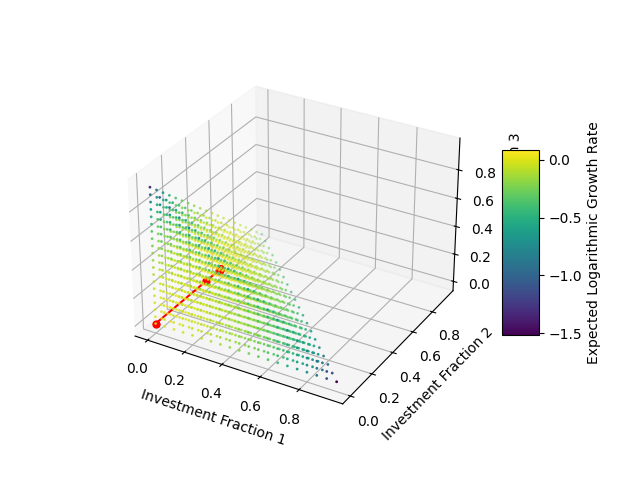

In [83]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from multivariate_kelly import kellyValue
from plot import draw3variablesPlot
from probability_generator import *

DIMENSION = 3
STATE_SIZE = 2
R = np.linspace(-1, 1, STATE_SIZE)
P = generateNdRandom(R.size, DIMENSION)

print("Expected return for investment 1:", np.sum(P, axis=(1,2)).dot(R))
print("Expected return for investment 2:", np.sum(P, axis=(0,2)).dot(R))
print("Expected return for investment 3:", np.sum(P, axis=(0,1)).dot(R))

fraction_range = np.arange(0, 1, 0.05)
value = np.zeros((fraction_range.size,) * DIMENSION)  # Placeholder for the expected logarithmic growth rate
# Calculate the expected logarithmic growth rate for each combination of x and y
for i, x in enumerate(fraction_range):
    for j, y in enumerate(fraction_range):
        for k, z in enumerate(fraction_range):
            if x + y + z <= 1:  # Ensure the fractions sum to 1 or less
                value[i, j, k] = kellyValue(R, P, np.array([x, y, z]))

# Newton Solver
X_points = newtonsMethod(R, P, verbose=True)

# print(value)

draw3variablesPlot(fraction_range, fraction_range, fraction_range, value, np.array(X_points))

In [84]:
X_points = newtonsMethod(R, P, verbose=True)

for i in range(P.ndim):
    compressed_P = np.sum(P, axis=i)
    X_points = newtonsMethod(R, compressed_P)
    points = np.column_stack((np.array(X_points), np.array([kellyValue(R, compressed_P, point) for point in X_points])))

    points = np.insert(points, i, np.full((1, 1), np.nan), axis=1)
    print(points)

Iteration 0: Investment fraction is: 0.00%, 0.00%, 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 0.00%, 43.50%, 0.00%, Log Return is: 0.085
Iteration 2: Investment fraction is: 0.00%, 54.50%, 0.00%, Log Return is: 0.072
Iteration 3: Investment fraction is: 0.00%, 55.65%, 0.00%, Log Return is: 0.070
Iteration 4: Investment fraction is: 0.00%, 55.85%, 0.08%, Log Return is: 0.070
Iteration 5: Investment fraction is: 0.00%, 55.89%, 0.15%, Log Return is: 0.070
Iteration 6: Investment fraction is: 0.00%, 55.91%, 0.18%, Log Return is: 0.070
Iteration 7: Investment fraction is: 0.00%, 55.92%, 0.20%, Log Return is: 0.070
Iteration 8: Investment fraction is: 0.00%, 55.92%, 0.22%, Log Return is: 0.070
Iteration 9: Investment fraction is: 0.00%, 55.92%, 0.22%, Log Return is: 0.070
Iteration 10: Investment fraction is: 0.00%, 55.92%, 0.23%, Log Return is: 0.070
Iteration 11: Investment fraction is: 0.00%, 55.92%, 0.23%, Log Return is: 0.070
Iteration 12: Investment fraction is: 0

## More random variables

A general formular for multivariate kelly criterion would be:

$ G(\vec{x}) = \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \ln{(1 + \vec{r}\cdot\vec{x})} $

$ \frac{dG}{dx_1} = \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \frac{r_{x_1}}{1 + \vec{r}\cdot\vec{x}} $

$ \frac{dG}{dx_2} = \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \frac{r_{x_2}}{1 + \vec{r}\cdot\vec{x}} $

$ \nabla G(\vec{x}) = \left[ \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \frac{r_{x_1}}{1 + \vec{r}\cdot\vec{x}}, ..., \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \frac{r_{x_n}}{1 + \vec{r}\cdot\vec{x}} \right] $ 

$ H_{G(\vec{x})_{ij}} = - \sum_{\vec{r}\in \vec{R}} p(\vec{r}) \frac{r_{x_i}r_{x_j}}{(1 + \vec{r}\cdot\vec{x})^2} $ 

Since it would be challenging to display the plot for more than 3 random variables, this section will only run a demo solver without plotting it.

In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
from newtons_method import newtonsMethod
import probability_generator as pg


R_RANGE = 6
DIMENSION = 9
R = np.linspace(-1, 1, R_RANGE)
P = pg.generateNdRandom(R_RANGE, DIMENSION)

X_points = newtonsMethod(R, P, verbose=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Iteration 0: Investment fraction is: 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, 0.00%, Log Return is: 0.000
Iteration 1: Investment fraction is: 0.01%, 0.05%, 0.01%, 0.07%, 0.00%, 0.00%, 0.00%, 0.03%, 0.13%, Log Return is: 0.000
Converged in 1 iterations.


### Performance Benchmarking

|Dimention \ <br>Return Range|    1   |    2    |     3     |      4      |        5       |         6        |        7       |         8        |         9        |
|:--------------------------:|:------:|:-------:|:---------:|:-----------:|:--------------:|:----------------:|:--------------:|:----------------:|:----------------:|
|**2**                       | 2<br>0s|  4<br>0s|    8<br>0s|     16<br>0s|        32<br>0s|          64<br>0s|       128<br>0s|         256<br>0s|         512<br>0s|
|**3**                       | 3<br>0s|  9<br>0s|   27<br>0s|     81<br>0s|       243<br>0s|         729<br>0s|     2,187<br>0s|       6,561<br>0s|      19,683<br>0s|
|**4**                       | 4<br>0s| 16<br>0s|   64<br>0s|    256<br>0s|     1,024<br>0s|       4,096<br>0s|    16,384<br>0s|      65,536<br>1s|     262,144<br>4s|
|**5**                       | 5<br>0s| 25<br>0s|  125<br>0s|    625<br>0s|     3,125<br>0s|      15,625<br>0s|    78,125<br>1s|     390,625<br>4s|  1,953,125<br>28s|
|**6**                       | 6<br>0s| 36<br>0s|  216<br>0s|  1,296<br>0s|     7,776<br>0s|      46,656<br>1s|   279,936<br>3s|  1,679,616<br>17s| 10,077,696<br>30s|
|**7**                       | 7<br>0s| 49<br>0s|  343<br>0s|  2,401<br>0s|    16,807<br>0s|     117,649<br>1s|   823,543<br>5s|  5,764,801<br>11s|                  |
|**8**                       |        |         |           |             |    32,768<br>0s|     262,144<br>3s| 2,097,152<br>3s| 16,777,216<br>65s|                  |
|**9**                       |        |         |           |             |    59,049<br>1s|     531,441<br>5s|                |                  |                  |
|**10**                      |        |         |           |             |   100,000<br>1s|   1,000,000<br>9s|                |                  |                  |
|**20**                      |20<br>0s|400<br>0s|8,000<br>0s|160,000<br>1s|3,200,000<br>25s| 64,000,000<br>53s|                |                  |                  |
